# Aprendendo Pandas com dados do INMET

Notebook criado para aprender a utilizar o Pandas.
Os dados utilizados foram obtidos no site do Instituto Nacional de Meteorologia (INMET) (http://www.inmet.gov.br/portal/), no dia 14/04/2020.
Foi feito o download dos dados diários, da estação de Sorocaba, do dia 01/01/1961 até 30/03/2020.

Os dados serão utilizados para realizar uma análise exploratória, com o intuito de me familiarizar com o Pandas e libs de plot, como matplotlib e seaborn.

In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

uri = "notebooks/csv/inmet_diario_formatado.csv"
inmet = pd.read_csv(uri)

inmet.head(10)

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
0,83851,01/01/1961,0,NaN,30.0,14.1,NaN,NaN,23.12,79.50,1.333333
1,83851,02/01/1961,0,6.7,29.6,14.0,NaN,NaN,22.42,81.00,1.333333
2,83851,03/01/1961,0,28.7,31.1,13.9,NaN,NaN,22.82,84.25,1.000000
3,83851,04/01/1961,0,0.0,30.8,14.6,NaN,NaN,23.48,79.50,1.000000
4,83851,05/01/1961,0,0.0,29.3,13.7,NaN,NaN,22.86,79.25,1.000000
5,83851,06/01/1961,0,0.0,29.8,13.5,NaN,NaN,23.10,81.50,1.666667
6,83851,07/01/1961,0,10.7,34.4,14.4,NaN,NaN,24.00,77.75,1.000000
7,83851,08/01/1961,0,0.0,29.2,13.8,NaN,NaN,23.08,77.25,1.000000
8,83851,09/01/1961,0,0.0,29.1,17.7,NaN,NaN,24.84,75.00,0.666667
9,83851,10/01/1961,0,0.0,30.3,18.3,NaN,NaN,25.52,74.00,1.000000


## Convertendo o campo Data de String para datetime

In [270]:
inmet["Data"] = pd.to_datetime(inmet["Data"], dayfirst=True, format="%d/%m/%Y")
inmet.head(10)


,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
0,83851,1961-01-01,0,NaN,30.0,14.1,NaN,NaN,23.12,79.50,1.333333
1,83851,1961-01-02,0,6.7,29.6,14.0,NaN,NaN,22.42,81.00,1.333333
2,83851,1961-01-03,0,28.7,31.1,13.9,NaN,NaN,22.82,84.25,1.000000
3,83851,1961-01-04,0,0.0,30.8,14.6,NaN,NaN,23.48,79.50,1.000000
4,83851,1961-01-05,0,0.0,29.3,13.7,NaN,NaN,22.86,79.25,1.000000
5,83851,1961-01-06,0,0.0,29.8,13.5,NaN,NaN,23.10,81.50,1.666667
6,83851,1961-01-07,0,10.7,34.4,14.4,NaN,NaN,24.00,77.75,1.000000
7,83851,1961-01-08,0,0.0,29.2,13.8,NaN,NaN,23.08,77.25,1.000000
8,83851,1961-01-09,0,0.0,29.1,17.7,NaN,NaN,24.84,75.00,0.666667
9,83851,1961-01-10,0,0.0,30.3,18.3,NaN,NaN,25.52,74.00,1.000000


# Análise exploratória
Algumas informações simples que podem ser obtidas através dos dados através do método "describe()". 

In [271]:
inmet.describe()

,Estacao,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
count,13576.0,13576.000000,13552.000000,13534.000000,13523.000000,11737.000000,12692.000000,13390.000000,13457.000000,12331.000000
mean,83851.0,0.795522,3.609128,27.489523,16.257007,5.993431,3.434526,21.050935,74.280839,1.350975
std,0.0,30.887914,9.908571,3.961121,3.573892,3.444823,1.564464,3.337599,9.656640,0.892404
min,83851.0,0.000000,0.000000,10.700000,1.000000,0.000000,0.000000,7.680000,31.500000,0.000000
25%,83851.0,0.000000,0.000000,25.100000,13.700000,3.000000,2.400000,18.840000,68.750000,0.666667
50%,83851.0,0.000000,0.000000,27.800000,16.500000,6.900000,3.300000,21.420000,74.500000,1.033333
75%,83851.0,0.000000,1.000000,30.400000,19.200000,8.900000,4.300000,23.520000,80.000000,1.866667
max,83851.0,1200.000000,164.400000,38.600000,25.100000,12.800000,13.900000,29.740000,99.000000,5.566667


## Temperatura
Trabalhando somente com dados de temperatura.

In [272]:
# Criando dataframe só com as colunas data, maxima e minima
temperatura = pd.DataFrame(data={'data': inmet.Data, 'maxima': inmet.TempMaxima, 'minima': inmet.TempMinima})
temperatura.head()

,data,maxima,minima
0,1961-01-01,30.0,14.1
1,1961-01-02,29.6,14.0
2,1961-01-03,31.1,13.9
3,1961-01-04,30.8,14.6
4,1961-01-05,29.3,13.7


## Dados de Temperatura Máxima

Maior Temperatura Máxima

In [273]:
maior_maxima = temperatura.query("maxima == @temperatura.maxima.max()")
maior_maxima

,data,maxima,minima
391,1962-02-26,38.6,15.6


Menor Temperatura Máxima

In [274]:
menor_maxima = temperatura.query("maxima == @temperatura.maxima.min()")
menor_maxima

,data,maxima,minima
11365,2013-07-24,10.7,7.2


Média de Temperatura Máxima

In [275]:
media_maxima = temperatura.maxima.mean().round(2)
media_maxima

27.49

## Dados de Temperatura Mínima

Maior Temperatura Mínima

In [276]:
maior_minima = temperatura.query("minima == @temperatura.minima.max()")
maior_minima

,data,maxima,minima
11561,2014-02-05,37.2,25.1


Menor Temperatura Mínima

In [277]:
menor_minima = temperatura.query("minima == @temperatura.minima.min()")
menor_minima

,data,maxima,minima
5445,1990-07-29,18.8,1.0
6645,2000-07-17,15.6,1.0


Média de Temperatura Mínima

In [278]:
media_minima = temperatura.minima.mean().round(2)
media_minima

16.26

## Dias que não possuem dados de alguma temperatura

Dias que não possuem dados de temperatura máxima

In [279]:
dias_sem_maxima = temperatura.query("@temperatura.maxima.isnull()")
dias_sem_maxima.head()

,data,maxima,minima
5253,1990-01-18,NaN,22.1
5276,1990-02-10,NaN,21.2
5908,1998-07-07,NaN,10.5
6002,1998-10-09,NaN,NaN
6095,1999-01-10,NaN,NaN


Dias que não possuem dados de temperatura mínima

In [280]:
dias_sem_minima = temperatura.query("@temperatura.minima.isnull()")
dias_sem_minima.head()

,data,maxima,minima
3317,1984-09-30,24.0,NaN
4902,1989-02-01,33.2,NaN
5331,1990-04-06,33.0,NaN
5337,1990-04-12,29.2,NaN
5720,1991-04-30,25.8,NaN


Dias que não possuem dados de temperatura

In [281]:
dias_sem_temperatura = temperatura.query("@temperatura.maxima.isnull() and @temperatura.minima.isnull()")
dias_sem_temperatura.head()

,data,maxima,minima
6002,1998-10-09,NaN,NaN
6095,1999-01-10,NaN,NaN
7551,2003-02-13,NaN,NaN
12086,2015-08-21,NaN,NaN
12087,2015-08-22,NaN,NaN


# Verificando correlações entre as temperaturas

Correlação entre as temperaturas

In [282]:
temperatura.corr()

,maxima,minima
maxima,1.000000,0.570788
minima,0.570788,1.000000


Pairplot das temperaturas

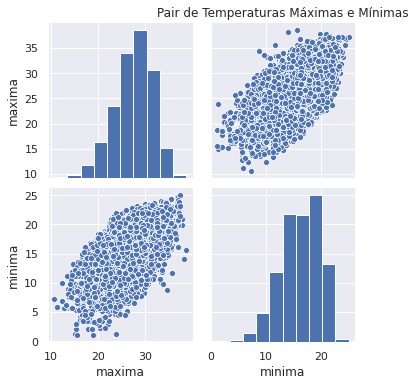

In [283]:
sns.pairplot(temperatura)
plt.title("Pair de Temperaturas Máximas e Mínimas")
plt.show()

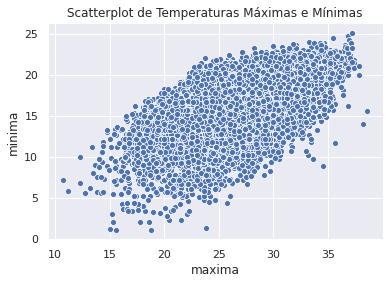

In [284]:
sns.scatterplot(data = temperatura, x = "maxima", y = "minima")
plt.title("Scatterplot de Temperaturas Máximas e Mínimas")
plt.show()

Quanto maior a temperatura máxima, maior a temperatura mínima, e vice versa? Parece que existe uma certa correlação desse tipo

# Adicionando ao dataframe a estação do ano (Feature Engineering)

Incluindo ao dataframe uma nova coluna especificando, qual a estação do ano em que ela ocorreu.  
As datas são aproximadas, já que pode ter uma pequena variação no dia, de acordo com o ano.

Outono: de 20 de março a 21 de junho. (Entre dias do ano: 79 e 172)  
Inverno: de 22 de junho a 22 de setembro. (Entre dias do ano: 173 e 265)  
Primavera: de 23 de setembro a 21 de dezembro. (Entre dias do ano: 266 e 355)  
Verão: de 22 de dezembro a 20 de março. (Qualquer outro dia)

In [285]:
import datetime

def calcula_estacao(data):
    """Calcula a estação do ano de acordo com o data passada"""
    dia_do_ano = data.data.timetuple().tm_yday
    
    if dia_do_ano >= 79 and dia_do_ano <= 172:        
        return "outono"
    
    if dia_do_ano >= 173 and dia_do_ano <= 265:
        return "inverno"
    
    if dia_do_ano >= 266 and dia_do_ano <= 355:
        return "primavera"
    
    return "verao"

temperatura["estacao"] = temperatura.apply(calcula_estacao, axis=1)
temperatura.head()

,data,maxima,minima,estacao
0,1961-01-01,30.0,14.1,verao
1,1961-01-02,29.6,14.0,verao
2,1961-01-03,31.1,13.9,verao
3,1961-01-04,30.8,14.6,verao
4,1961-01-05,29.3,13.7,verao


## Explorando dados baseado nas estações do ano

Criando um DataFrame para cada estação, assim fica mais fácil com as estações separadamente, quando conveniente.

In [286]:
temperatura_outono = temperatura.query("estacao == 'outono'")
temperatura_inverno = temperatura.query("estacao == 'inverno'")
temperatura_primavera = temperatura.query("estacao == 'primavera'")
temperatura_verao = temperatura.query("estacao == 'verao'")

Plotando os dados de cada estação do ano.

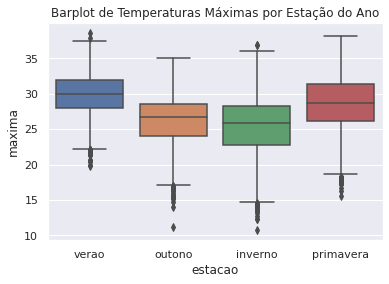

In [287]:
sns.boxplot(data = temperatura, x = "estacao", y = "maxima")
plt.title("Barplot de Temperaturas Máximas por Estação do Ano")
plt.show()

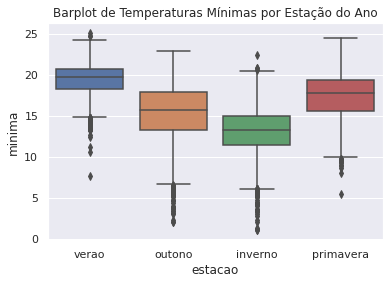

In [288]:
sns.boxplot(data = temperatura, x = "estacao", y = "minima")
plt.title("Barplot de Temperaturas Mínimas por Estação do Ano")
plt.show()

Estações da maior e da menor temperatura do período do dataset.

In [289]:
temperatura.query("maxima == @temperatura.maxima.max()")

,data,maxima,minima,estacao
391,1962-02-26,38.6,15.6,verao


In [290]:
temperatura.query("minima == @temperatura.minima.min()")

,data,maxima,minima,estacao
5445,1990-07-29,18.8,1.0,inverno
6645,2000-07-17,15.6,1.0,inverno


## Informações obtidas através dos gráficos e das queries
Como esperado, o verão concentra a maior parte de suas temperaturas acima das outras estações, tanto a máxima quanto a mínima.  
As distribuições das temperaturas máximas e mínimas para cada estação são bem parecidas.  
O dia mais quente e o dia mais frio do período representado pelo dataset aconteceram, respectivamente, nas estações verão e inverno.  

# Alterando o DataFrame para a realização de mais explorações

### Alterar o DataFrame separando dia/mês/ano em colunas diferentes

In [292]:
datas = temperatura.data
anos = []
meses = []
dias_do_ano = []
dias_do_mes = []

for data in datas:
    anos.append(data.year)
    meses.append(data.month)
    dias_do_mes.append(data.day)
    dias_do_ano.append(data.dayofyear)
    
anos = np.array(anos)
meses = np.array(meses)
dias_do_mes = np.array(dias_do_mes)
dias_do_ano = np.array(dias_do_ano)

temperatura_data_separada = temperatura.copy()
temperatura_data_separada["ano"] = anos
temperatura_data_separada["mes"] = meses
temperatura_data_separada["dia_do_mes"] = dias_do_mes
temperatura_data_separada["dia_do_ano"] = dias_do_ano

#temperatura_data_separada = temperatura_data_separada.drop(columns = "data")

# Exportando dataframe criado para CSV
temperatura_data_separada.to_csv("notebooks/csv/temperatura_data_separada.csv", index=False)
temperatura_data_separada.tail()


,data,maxima,minima,estacao,ano,mes,dia_do_mes,dia_do_ano
13571,2020-03-27,29.0,16.8,outono,2020,3,27,87
13572,2020-03-28,30.2,16.4,outono,2020,3,28,88
13573,2020-03-29,26.8,19.6,outono,2020,3,29,89
13574,2020-03-30,29.6,19.1,outono,2020,3,30,90
13575,2020-03-31,29.6,16.2,outono,2020,3,31,91


### Plotando as distribuições das Temperaturas Máximas e Mínimas

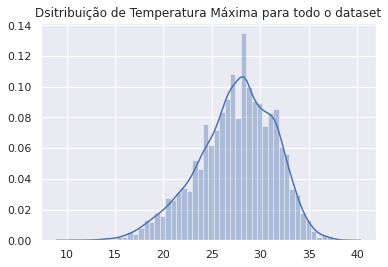

In [293]:
plt.title("Dsitribuição de Temperatura Máxima para todo o dataset")
sns.distplot(temperatura_data_separada[["maxima"]])
plt.show()

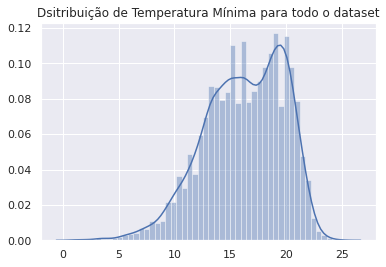

In [294]:
plt.title("Dsitribuição de Temperatura Mínima para todo o dataset")
sns.distplot(temperatura_data_separada[["minima"]])
plt.show()

### Plotando os dados de temperaturas máximas e mínimas por ano



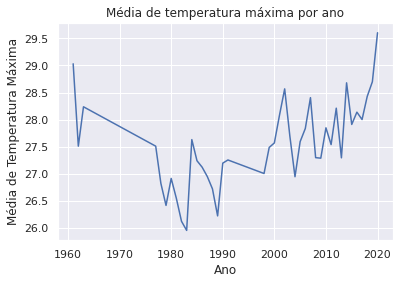

In [295]:
plt.title("Média de temperatura máxima por ano")
plt.xlabel("Ano")
plt.ylabel("Média de Temperatura Máxima")
sns.lineplot(data = temperatura_data_separada.groupby("ano")["maxima"].mean())
plt.show()

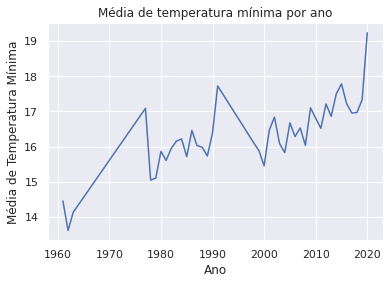

In [296]:
plt.title("Média de temperatura mínima por ano")
plt.xlabel("Ano")
plt.ylabel("Média de Temperatura Mínima")
sns.lineplot(data = temperatura_data_separada.groupby("ano")["minima"].mean())
plt.show()

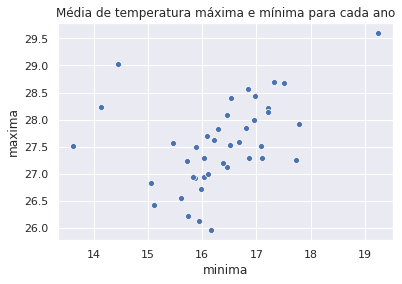

In [297]:
# Cada ponto é um ano
plt.title("Média de temperatura máxima e mínima para cada ano")
sns.scatterplot(data = temperatura_data_separada.groupby("ano").mean(), x = "minima", y = "maxima")
plt.show()

# Explorando informações por dia

## Médias por dia do ano

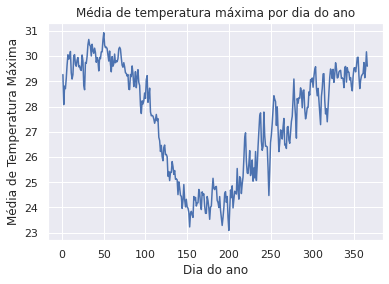

In [298]:
plt.title("Média de temperatura máxima por dia do ano")
plt.xlabel("Dia do ano")
plt.ylabel("Média de Temperatura Máxima")
sns.lineplot(data = temperatura_data_separada.groupby("dia_do_ano")["maxima"].mean())
plt.show()

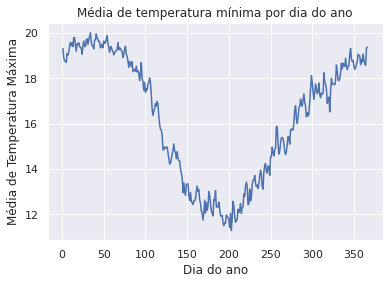

In [299]:
plt.title("Média de temperatura mínima por dia do ano")
plt.xlabel("Dia do ano")
plt.ylabel("Média de Temperatura Máxima")
sns.lineplot(data = temperatura_data_separada.groupby("dia_do_ano")["minima"].mean())
plt.show()

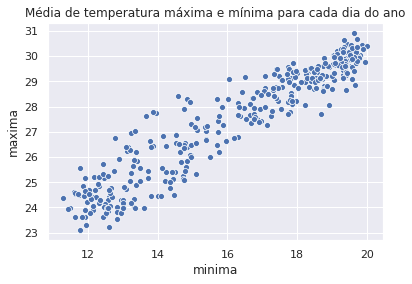

In [300]:
# Cada ponto é um dia do ano
plt.title("Média de temperatura máxima e mínima para cada dia do ano")
sns.scatterplot(data = temperatura_data_separada.groupby("dia_do_ano").mean(), x = "minima", y = "maxima")
plt.show()

## Médias de dia do mês

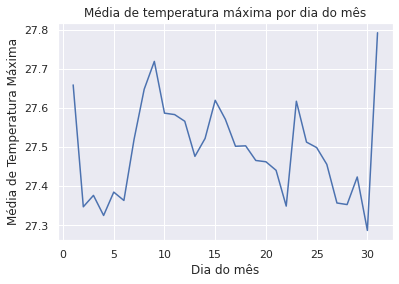

In [301]:
plt.title("Média de temperatura máxima por dia do mês")
plt.xlabel("Dia do mês")
plt.ylabel("Média de Temperatura Máxima")
sns.lineplot(data = temperatura_data_separada.groupby("dia_do_mes")["maxima"].mean())
plt.show()

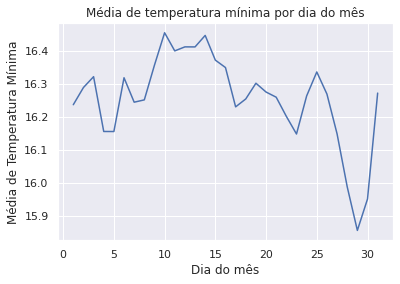

In [302]:
plt.title("Média de temperatura mínima por dia do mês")
plt.xlabel("Dia do mês")
plt.ylabel("Média de Temperatura Mínima")
sns.lineplot(data = temperatura_data_separada.groupby("dia_do_mes")["minima"].mean())
plt.show()

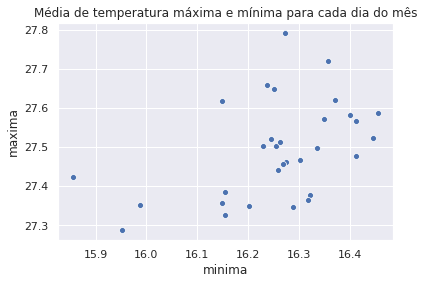

In [303]:
# Cada ponto é um dia do mês
plt.title("Média de temperatura máxima e mínima para cada dia do mês")
sns.scatterplot(data = temperatura_data_separada.groupby("dia_do_mes").mean(), x = "minima", y = "maxima")
plt.show()

# Explorando informações por mês

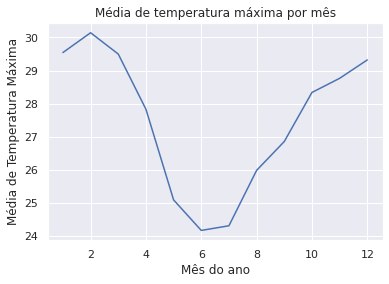

In [304]:
plt.title("Média de temperatura máxima por mês")
plt.xlabel("Mês do ano")
plt.ylabel("Média de Temperatura Máxima")
sns.lineplot(data = temperatura_data_separada.groupby("mes")["maxima"].mean())
plt.show()

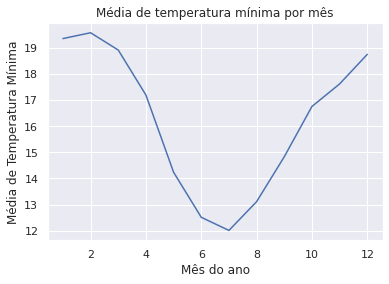

In [305]:
plt.title("Média de temperatura mínima por mês")
plt.xlabel("Mês do ano")
plt.ylabel("Média de Temperatura Mínima")
sns.lineplot(data = temperatura_data_separada.groupby("mes")["minima"].mean())
plt.show()

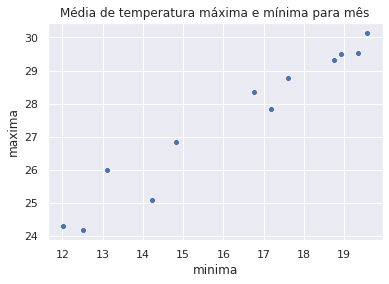

In [306]:
# Cada ponto é um mês
plt.title("Média de temperatura máxima e mínima para mês")
sns.scatterplot(data = temperatura_data_separada.groupby("mes").mean(), x = "minima", y = "maxima")
plt.show()

### Plotando as temperaturas do mesmo dia para anos diferentes

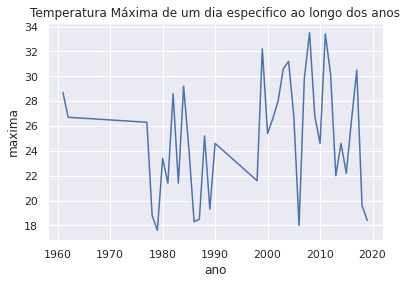

In [307]:
plt.title("Temperatura Máxima de um dia especifico ao longo dos anos")
dia_do_mes = 5
mes = 9
data = temperatura_data_separada.query("dia_do_mes == @dia_do_mes & mes == @mes")
sns.lineplot(data = data, x = "ano", y = "maxima")
plt.show()

## Plotando Temperaturas Máximas e Mínimas durante todo o período

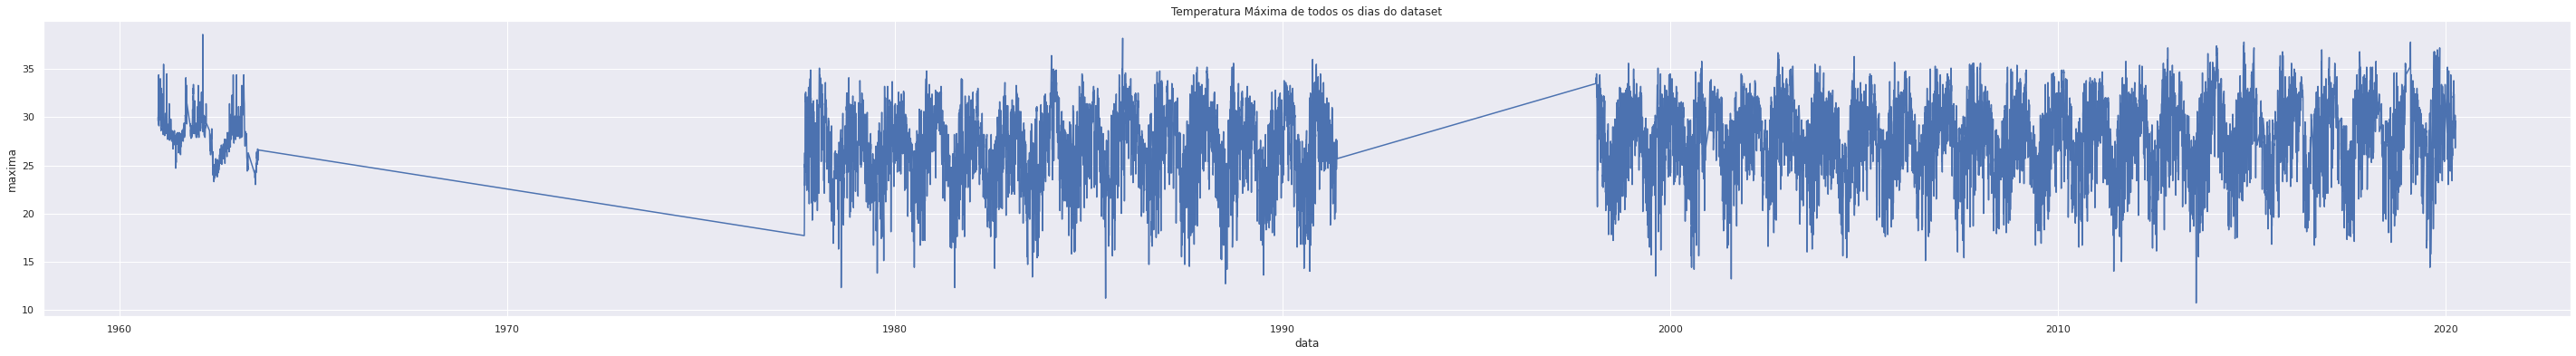

In [308]:
plt.figure(figsize=(50,6))
plt.title("Temperatura Máxima de todos os dias do dataset")
sns.lineplot(data = temperatura_data_separada, x = "data", y = "maxima")
plt.show()

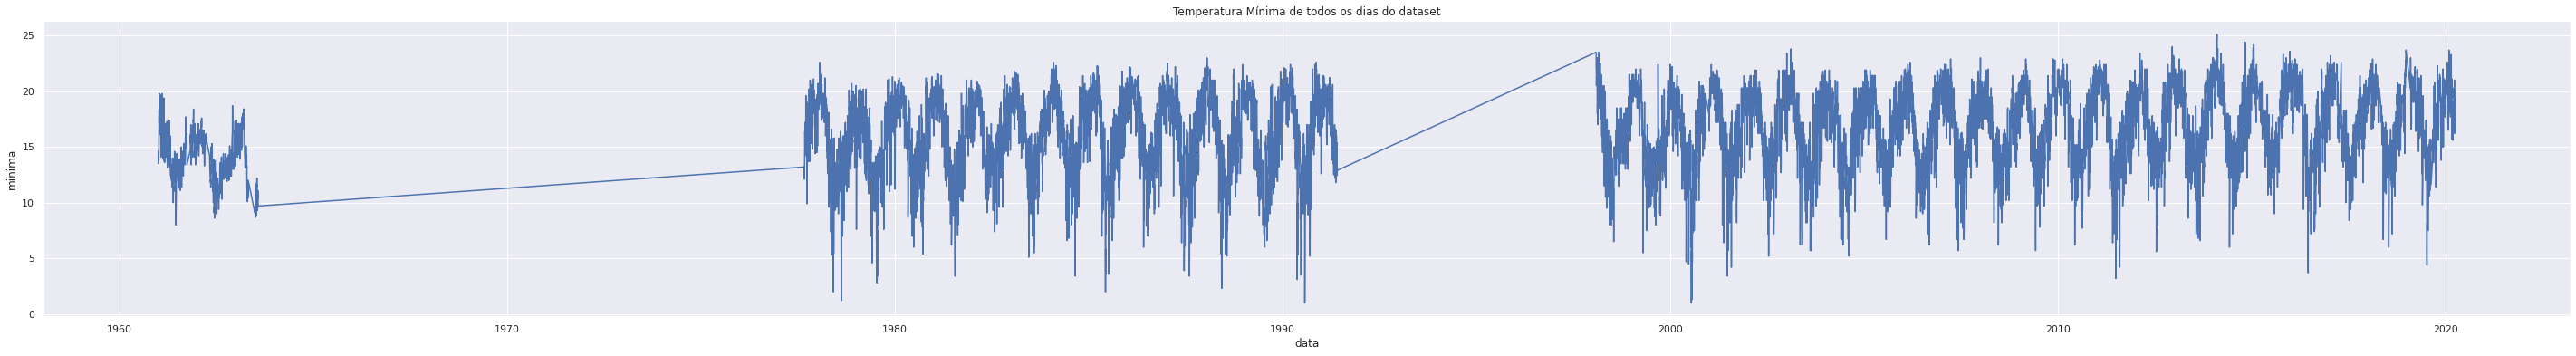

In [309]:
plt.figure(figsize=(50,6))
plt.title("Temperatura Mínima de todos os dias do dataset")
sns.lineplot(data = temperatura_data_separada, x = "data", y = "minima")
plt.show()

# Considerações Finais e Hipotéses

À partir da Análise Exploratória foi possível visualizar e confirmar o que já era esperado, como:
- As temperaturas máximas e mínimas são menores no inverno e maiores no verão.
- Existe uma certa correlação entre as temperaturas máximas e mínimas. Quanto maior uma, maior a outra.
- A média de temperatura varia em ciclos dentro de um ano.

Além disso, foram feitas as seguintes observações e hipóteses:  

**Observações:**
- A média de temperaturas, tanto máxima quanto mínima, está aumentando com o passar dos anos.
- A temperatura de um mesmo dia, ao longo dos anos, não apresenta um padrão claro.
- A variação das temperaturas, tanto máxima quanto mínima, formam um tipo de ciclo/padrão durante os anos.

**Hipóteses:**
- É possível prever temperutas máximas e mínimas utilizando dados do passado.
- É possível prever a temperatura máxima de um dia à partir da temperatura mínima do mesmo dia, e vice versa.


À partir dessas perguntas eu continuarei os estudos, agora na área de Machine Learning, tentando criar modelos para verficar se as hipóteses são verdadeiras.